In [78]:
#04/02/2019
import numpy as np # Algebre linéaire
import pandas as pd # Data processing, CSV

from PIL import Image # Image display
import matplotlib.pyplot as plt

from io import BytesIO # Image request
import requests

import bq_helper # Data train querry
from bq_helper import BigQueryHelper

from sklearn.model_selection import train_test_split

import os

In [79]:
def images_from_url(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

In [80]:
open_images = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="open_images")
bq_assistant = BigQueryHelper("bigquery-public-data", "open_images")

# Liste des tables :
#['annotations_bbox', 'dict', 'images', 'labels']

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [81]:
subQueryImages = """
(SELECT image_id, original_url
FROM `bigquery-public-data.open_images.images`)
"""

subQueryBox = """
(SELECT image_id, label_name, x_min, x_max, y_min, y_max
FROM `bigquery-public-data.open_images.annotations_bbox`
ORDER BY image_id
LIMIT 100000)
"""

subQueryWord = """
(SELECT label_name, label_display_name
FROM `bigquery-public-data.open_images.dict`)
"""

labelQuery = """
(SELECT ROW_NUMBER() OVER (ORDER BY wrd.label_name) - 1 AS row, wrd.label_name
FROM (SELECT DISTINCT(label_name) FROM """ + subQueryBox + """) lab
JOIN """ + subQueryWord + """ wrd ON lab.label_name = wrd.label_name)"""

mainQuery = """
SELECT img.original_url, wrd.label_display_name, box.label_name, idx.row, box.x_min, box.x_max, box.y_min, box.y_max
FROM """ + subQueryImages + """ img
INNER JOIN """ + subQueryBox + """ box ON img.image_id = box.image_id
INNER JOIN """ + subQueryWord + """ wrd ON box.label_name = wrd.label_name
INNER JOIN """ + labelQuery + """ idx ON idx.label_name = wrd.label_name
ORDER BY img.image_id
"""

dataset = open_images.query_to_pandas_safe(mainQuery)

"""
for i in range(0, 10):
    plt.imshow(images_from_url(dataset.original_url[i]))
    plt.show()
    print(dataset.label_display_name[i])
    print(dataset.original_url[i])"""

'\nfor i in range(0, 10):\n    plt.imshow(images_from_url(dataset.original_url[i]))\n    plt.show()\n    print(dataset.label_display_name[i])\n    print(dataset.original_url[i])'

In [159]:
"""
file = images_from_url(dataset.original_url[120])

tmp = np.array(file.resize((100, 100)))
plt.imshow(tmp)
plt.show()
print(dataset.label_display_name[120])
"""

features = []
labels = []
labelsWord = []
labelsBox = []

# dataset.label_name.size
data_length = 25

for data_ex in range (0, data_length):
    features.append(np.array(images_from_url(dataset.original_url[data_ex]).resize((100, 100))))
    one_hot_vector = np.zeros(labelUnique.shape[0])
    one_hot_vector[dataset.row[data_ex]] = 1
    #labelsWord.append(one_hot_vector)
    #labelsBox.append([dataset.x_min[data_ex], dataset.y_min[data_ex], dataset.x_max[data_ex], dataset.y_max[data_ex]])
    labels.append(np.array([one_hot_vector, dataset.x_min[data_ex], dataset.y_min[data_ex], dataset.x_max[data_ex], dataset.y_max[data_ex]]))

In [160]:
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.2, random_state=42)
print(type(y_train))
y_train = np.array(y_train)
y_train_word = y_train[:, 0]
y_train_box = y_train[:, 1:5]

<class 'list'>


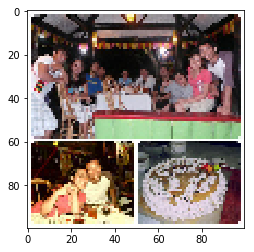

[0.016 0.188 0.173 0.584]


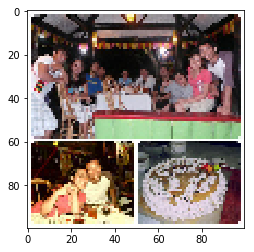

[0.055 0.908 0.463 0.994]


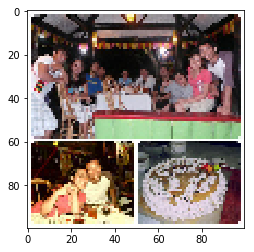

[0.56 0.696 0.951 1.0]


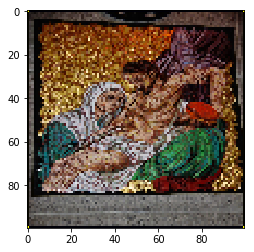

[0.72 0.418 0.891 0.532]


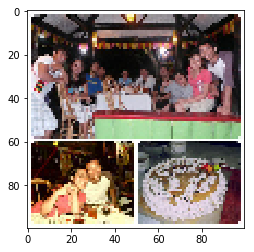

[0.543 0.7 0.908 0.995]


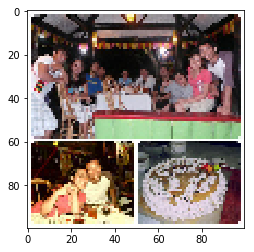

[0.019 0.767 0.098 0.892]


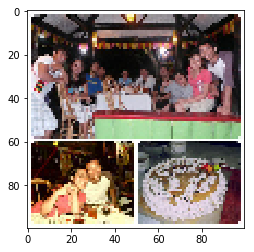

[0.031 0.697 0.448 0.967]


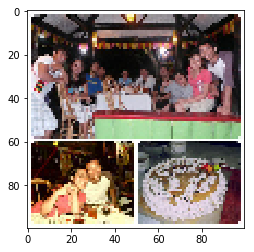

[0.522 0.675 0.917 0.966]


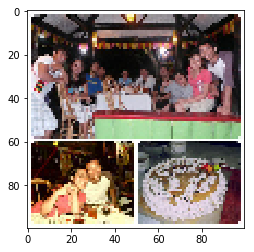

[0.602 0.309 0.766 0.489]


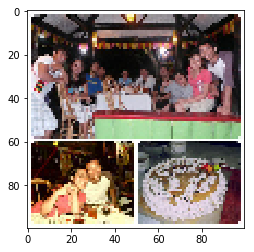

[0.522 0.675 0.917 0.966]


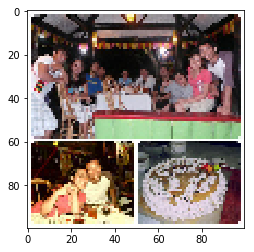

[0.039 0.775 0.134 0.872]


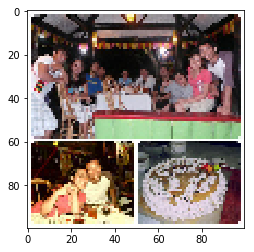

[0.009 0.75 0.119 0.92]


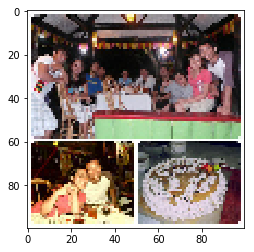

[0.047 0.706 0.286 0.984]


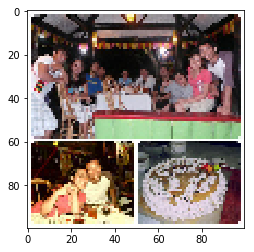

[0.51 0.642 0.98 0.987]


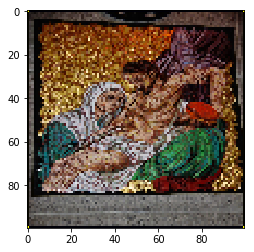

[0.044 0.356 0.482 0.841]


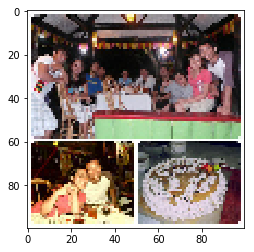

[0.522 0.675 0.917 0.966]


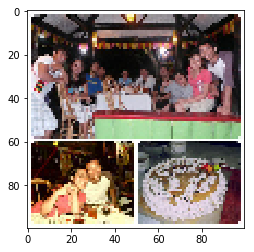

[0.706 0.164 0.903 0.481]


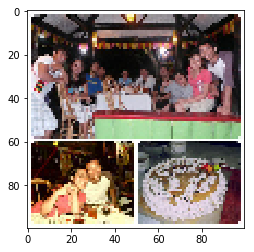

[0.094 0.7 0.262 0.966]


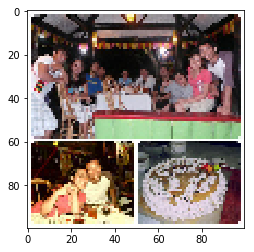

[0.611 0.287 0.75 0.469]


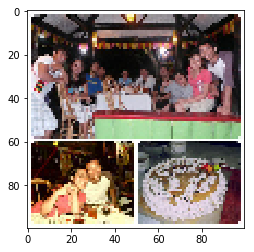

[0.522 0.675 0.917 0.966]


In [161]:
for i in range (0, 20):
    plt.imshow(X_train[i])
    plt.show()
    print(y_train_box[i])